# Workshop 2: Clinical Variables Selection & Feature Engineering

# 🎯 Workshop Goals
The goal of this workshop is to provide participants with a deep understanding of data preprocessing in the data science workflow. Specifically, by the end of this workshop, participants should be able to:

1. **Understand the importance of Data Preprocessing Techniques**: Understanding thes significance of data preprocessing in the data science workflow. This includes to be able to apply common techniques such as cleaning, normalization, transformation, and reduction of data. This also includes handling missing data, outliers, skewed data, and data with different scales.

3. **Familiarize with Data Pre-processing Techniques**: such as feature scaling, dimensionality reduction, and feature engineering.

4. **Apply data pre-processing techniques**: This involved the practical application of data preprocessing techniques to real-world datasets and to be able to evaluate the impact of different preprocessing techniques on machine learning model performance.

Be aware of the potential biases that can be introduced in data preprocessing, and how to identify and mitigate them.
Throughout the workshop, participants will engage in hands-on activities, case studies, and real-world examples. They will work in groups to apply the concepts learned to real datasets, and engage in discussions to share their experiences and insights. By the end of the workshop, participants should have gained a solid understanding of data preprocessing techniques and their importance in the data science workflow, and be able to apply these techniques to improve the performance of machine learning models.

# ✏️ Expected Deliverables

1. A report or dashboard summarizing the results of EDA, including visualizations and statistical summaries of the data distribution and correlations.

2. A set of code scripts or pipelines that automate the data preprocessing process, making it easier and more efficient to apply these techniques to future datasets.

3. A cleaned dataset that has undergone preprocessing techniques such as removal of duplicates, handling missing data, and dealing with outliers. The cleaned dataset should be ready to be fed into machine learning models.

# ❗ Highlighted Pitfall(s)
1. Make sure to apply preprocessing steps only to the training data and avoid using information from the validation set to prevent data leakage.

2. Check for potential biases that could be introduced or amplified by preprocessing techniques, and evaluate the impact of these techniques on different subgroups of the data.

3. Carefully evaluate the appropriateness of different preprocessing techniques for a given dataset and ensure that the techniques are applied correctly to avoid incorrect preprocessing that could lead to poor model performance or incorrect conclusions about the data.

## **1.  Setup environment**
---

In [1]:
install.packages(c('caret', 'mlbench', 'ggplot2', 'vioplot', 'tableone', 'naniar'))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(dplyr)
library(caret)
library(ggplot2)
library(vioplot)
library(tableone)
library(naniar)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Loading required package: lattice

Loading required package: sm

Package 'sm', version 2.2-5.7: type help(sm) for summary information

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




 ## **2. Data Analysis**
---


Once we understand the problem, we have formed a multidisciplinary team, formulated the research question,  hypothesis, we have to start working with the data. What data do we have? How do they look? What distributions do they have?

Let's remember that in data science, data is the most important thing, and whether or not we can solve a problem depends on the data quality. At the same time, understanding the data also helps us to have a clearer vision of what we are facing and in case the data is not very good, we can at least fix it.

Specifically, understanding the problem and the data are the essential phases in a data science project. An error in this phase is much more critical than an error in the modeling and evaluation phases. We must bear in mind that machine learning is not a magical tool that solves any type of problem, but rather a mathematical/statistical tool that learns from what we teach it, therefore if the data has biases, the model will also have them.

### Read the dataset

Let's asume that you already have the dataset of [workshop 1](https://github.com/CriticalDatathon/workshops/blob/main/solutions/workshop_1.py):

###### ✏️ Read the dataset and use the function null_values to see which columns has missing data.

In [3]:
# Dataset Path:
PATH <- 'workshop_1.csv' #@param {type:"string"}

In [4]:
# Function: calculate_mean
# Description: Calculates the mean of a numeric vector.
# 
# Parameters:
#   x (numeric): Input vector for which the mean needs to be calculated.
# 
# Returns:
#   The mean value of the input vector.

null_values <- function(df) {

  # Check if there are null values in the dataframe
  nulos <- anyNA(df)

  if (!nulos)
  {
    print("There aren't null values in the dataframe")
  } 
  else 
  {
    # Print columns with null values
    print("Null values:")
    print(colnames(df)[colSums(is.na(df)) > 0])
  }
}


In [5]:
# Read file
df <- read.csv(PATH)
cat(paste("The dataset has", nrow(df), "rows and", ncol(df), "columns\n"))

# Check if there are null values
null_values(df)

# Print first 5 rows
head(df)

The dataset has 20041 rows and 138 columns
[1] "Null values:"
 [1] "weight"                         "height"                        
 [3] "BMI"                            "delta_vent_start"              
 [5] "delta_FiO2"                     "FiO2"                          
 [7] "delta_rrt"                      "delta_vp_start"                
 [9] "norepinephrine_equivalent_dose" "delta_sofa_coag"               
[11] "sofa_coag"                      "delta_sofa_liver"              
[13] "sofa_liver"                     "delta_sofa_cns"                
[15] "sofa_cns"                       "delta_sofa_renal"              
[17] "sofa_renal"                     "delta_sofa_resp"               
[19] "sofa_resp"                      "delta_hemoglobin"              
[21] "hemoglobin"                     "delta_hematocrit"              
[23] "hematocrit"                     "delta_mch"                     
[25] "mch"                            "delta_mchc"                    
[27] "mchc"    

,subject_id,stay_id,SaO2_timestamp,SaO2,delta_SpO2,SpO2,hidden_hypoxemia,hadm_id,gender,sex_female,⋯,delta_mbp,mbp,delta_resp_rate,resp_rate,delta_temperature,temperature,delta_glucose,glucose,delta_heart_rhythm,heart_rhythm
,<int>,<int>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<chr>,<int>,⋯,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,10001884,37510196,2131-01-12 21:04:00,90,-4,89,0,26184834,F,1,⋯,-3,96.0,-4,19.5,-64,36.72,445,199,-4,SR (Sinus Rhythm)
2,10002013,39060235,2160-05-18 16:03:00,99,0,99,0,23581541,F,1,⋯,-3,86.5,-2,14.0,-3,36.90,0,155,-3,SR (Sinus Rhythm)
3,10002428,38875437,2156-04-20 00:46:00,97,0,100,0,28662225,F,1,⋯,-1,68.0,-1,18.0,14,36.94,164,163,14,SR (Sinus Rhythm)
4,10002428,38875437,2156-04-21 02:20:00,98,-3,100,0,28662225,F,1,⋯,-5,70.0,-5,23.0,100,37.33,-10,135,-20,ST (Sinus Tachycardia)
5,10002760,31831386,2141-04-20 16:10:00,97,-10,99,0,28094813,M,0,⋯,-10,70.0,-10,16.0,1190,36.39,0,107,-10,SR (Sinus Rhythm)
6,10002760,31831386,2141-04-21 02:04:00,99,-4,100,0,28094813,M,0,⋯,-4,81.0,-4,17.0,596,36.39,0,97,-4,SR (Sinus Rhythm)


 ## **3. Understand your Data**
---


### Understand the variables:

The first step is to understand what variables your dataset has and how these variables are distributed. The columns and data types are:

Discuss with your team about the problem and what variables are needed 



| name                           | type    | description                                                                                                |
|:-------------------------------|:--------|:-----------------------------------------------------------------------------------------------------------|
| subject_id                     | int64   | Unique identifier for each patient                                                                         |
| stay_id                        | int64   | Unique identifier for each hospital stay                                                                   |
| SaO2_timestamp                 | object  | Timestamp for SaO2 measurement                                                                             |
| SaO2                           | float64 | Arterial oxygen saturation                                                                                 |
| delta_SpO2                     | int64   | Time offset (in minutes) in the measurement of peripheral oxygen saturation                                |
| SpO2                           | int64   | Peripheral oxygen saturation                                                                               |
| hidden_hypoxemia               | int64   | Indicates if the patient had hypoxemia without clinical signs                                              |
| hadm_id                        | int64   | Unique identifier for each hospital admission                                                              |
| gender                         | object  | Gender of the patient                                                                                      |
| sex_female                     | int64   | Indicates if the patient is female                                                                         |
| anchor_age                     | int64   | Age of the patient at the time of admission                                                                |
| race                           | object  | Race of the patient                                                                                        |
| race_group                     | object  | Grouping of race into broader categories                                                                   |
| language                       | object  | Primary language spoken by the patient                                                                     |
| insurance                      | object  | Type of insurance of the patient                                                                           |
| weight                         | float64 | Weight of the patient in kilograms                                                                         |
| height                         | float64 | Height of the patient in centimeters                                                                       |
| BMI                            | float64 | Body Mass Index of the patient                                                                             |
| anchor_year_group              | object  | Grouping of admission year into broader categories                                                         |
| first_hosp_stay                | bool    | Indicates if this is the first hospital stay for the patient                                               |
| first_icu_stay                 | bool    | Indicates if this is the first ICU stay for the patient                                                    |
| icustay_seq                    | int64   | Sequence number of ICU stay for the patient                                                                |
| admittime                      | object  | Timestamp for hospital admission                                                                           |
| dischtime                      | object  | Timestamp for hospital discharge                                                                           |
| icu_intime                     | object  | Timestamp for ICU admission                                                                                |
| icu_outtime                    | object  | Timestamp for ICU discharge                                                                                |
| los_hospital                   | int64   | Length of hospital stay in days                                                                            |
| los_icu                        | float64 | Length of ICU stay in days                                                                                 |
| CCI                            | int64   | Charlson Comorbidity Index                                                                                 |
| SOFA_admission                 | int64   | Sequential Organ Failure Assessment (SOFA) score at admission                                              |
| mortality_in                   | int64   | Indicates if the patient died during the hospital stay                                                     |
| delta_vent_start               | float64 | Time since ventilation started (in minutes) at the time of the measurement                                 |
| ventilation_status             | object  | Indicates if the patient was on mechanical ventilation                                                     |
| invasive_vent                  | int64   | Indicates if the patient was on invasive mechanical ventilation                                            |
| delta_FiO2                     | float64 | Time offset (in minutes) in the measurement of inspired oxygen (FiO2)                                      |
| FiO2                           | float64 | Fraction of inspired oxygen                                                                                |
| delta_rrt                      | float64 | Time since renal replacement therapy (in minutes) at the time of the measurement                           |
| rrt                            | int64   | Indicates if the patient was on renal replacement therapy                                                  |
| delta_vp_start                 | float64 | Time since vasopressor therapy started (in minutes) at the time of the measurement                         |
| norepinephrine_equivalent_dose | float64 | Dose of norepinephrine equivalent to other vasopressors (in mcg/kg/min)                                    |
| delta_sofa_coag                | float64 | Time offset (in minutes) in the measurement of SOFA score for coagulation from the previous measurement    |
| sofa_coag                      | float64 | SOFA score for coagulation                                                                                 |
| delta_sofa_liver               | float64 | Time offset (in minutes) in the measurement of SOFA score for liver from the previous measurement          |
| sofa_liver                     | float64 | SOFA score for liver                                                                                       |
| delta_sofa_cv                  | int64   | Time offset (in minutes) in the measurement of SOFA score for cardiovascular from the previous measurement |
| sofa_cv                        | int64   | Cardiovascular component of Sequential Organ Failure Assessment (SOFA) score                               |
| delta_sofa_cns                 | float64 | Time offset (in minutes) in the measurement of central nervous system component of SOFA                    |
| sofa_cns                       | float64 | Central nervous system component of SOFA score                                                             |
| delta_sofa_renal               | float64 | Time difference between the SaO2 measurement and the timestamp of the SaO2 measurement                     |
| sofa_renal                     | float64 | Renal component of SOFA score                                                                              |
| delta_sofa_resp                | float64 | Time offset (in minutes) in the measurement of respiratory component of SOFA                               |
| sofa_resp                      | float64 | Respiratory component of SOFA score                                                                        |
| delta_hemoglobin               | float64 | Time offset (in minutes) in the measurement of hemoglobin level                                            |
| hemoglobin                     | float64 | Hemoglobin level                                                                                           |
| delta_hematocrit               | float64 | Time offset (in minutes) in the measurement of Change in hematocrit level                                  |
| hematocrit                     | float64 | Hematocrit level                                                                                           |
| delta_mch                      | float64 | Time offset (in minutes) in the measurement of mean corpuscular hemoglobin                                 |
| mch                            | float64 | Mean corpuscular hemoglobin                                                                                |
| delta_mchc                     | float64 | Time offset (in minutes) in the measurement of mean corpuscular hemoglobin concentration                   |
| mchc                           | float64 | Mean corpuscular hemoglobin concentration                                                                  |
| delta_mcv                      | float64 | Time offset (in minutes) in the measurement of mean corpuscular volume                                     |
| mcv                            | float64 | Mean corpuscular volume                                                                                    |
| delta_platelet                 | float64 | Time offset (in minutes) in the measurement of platelet count                                              |
| platelet                       | float64 | Platelet count                                                                                             |
| delta_rbc                      | float64 | Time offset (in minutes) in the measurement of red blood cell count                                        |
| rbc                            | float64 | Red blood cell count                                                                                       |
| delta_rdw                      | float64 | Time offset (in minutes) in the measurement of Change in red cell distribution width                       |
| rdw                            | float64 | Red cell distribution width                                                                                |
| delta_wbc                      | float64 | Time offset (in minutes) in the measurement of white blood cell count                                      |
| wbc                            | float64 | White blood cell count                                                                                     |
| delta_d_dimer                  | float64 | Time offset (in minutes) in the measurement of Change in D-dimer                                           |
| d_dimer                        | float64 | D-dimer level                                                                                              |
| delta_fibrinogen               | float64 | Time offset (in minutes) in the measurement of fibrinogen level                                            |
| fibrinogen                     | float64 | Fibrinogen level                                                                                           |
| delta_thrombin                 | float64 | Time offset (in minutes) in the measurement of thrombin time                                               |
| thrombin                       | float64 | Thrombin time                                                                                              |
| delta_inr                      | float64 | Time offset (in minutes) in the measurement of Change in international normalized ratio (INR)              |
| inr                            | float64 | International normalized ratio (INR)                                                                       |
| delta_pt                       | float64 | Time offset (in minutes) in the measurement of prothrombin time (PT)                                       |
| pt                             | float64 | Prothrombin time (PT)                                                                                      |
| delta_ptt                      | float64 | Time offset (in minutes) in the measurement of partial thromboplastin time (PTT)                           |
| ptt                            | float64 | Partial thromboplastin time (PTT)                                                                          |
| delta_alt                      | float64 | Time offset (in minutes) in the measurement of alanine transaminase (ALT) level                            |
| alt                            | float64 | Alanine transaminase (ALT) level                                                                           |
| delta_alp                      | float64 | Time offset (in minutes) in the measurement of hhange in alkaline phosphatase (ALP) level                  |
| alp                            | float64 | Alkaline phosphatase (ALP) level                                                                           |
| delta_ast                      | float64 | Time offset (in minutes) in the measurement of aspartate transaminase (AST) level                          |
| ast                            | float64 | Aspartate transaminase (AST) level                                                                         |
| delta_bilirubin_total          | float64 | Time offset (in minutes) in the measurement of total bilirubin level                                       |
| bilirubin_total                | float64 | Total bilirubin level                                                                                      |
| delta_bilirubin_direct         | float64 | Time offset (in minutes) in the measurement of  direct bilirubin level                                     |
| bilirubin_direct               | float64 | Direct bilirubin level                                                                                     |
| delta_bilirubin_indirect       | float64 | Time offset (in minutes) in the measurement of indirect bilirubin level                                    |
| bilirubin_indirect             | float64 | Indirect bilirubin level                                                                                   |
| delta_ck_cpk                   | float64 | Time offset (in minutes) in the measurement of  creatine kinase (CPK) level                                |
| ck_cpk                         | float64 | Creatine kinase (CPK) level                                                                                |
| delta_ck_mb                    | float64 | Time offset (in minutes) in the measurement of  creatine kinase MB (CK-MB) level                           |
| ck_mb                          | float64 | Creatine kinase MB (CK-MB) level                                                                           |
| delta_ggt                      | float64 | Time offset (in minutes) in the measurement of  gamma-glutamyl transferase (GGT) level                     |
| ggt                            | float64 | Gamma-glutamyl transferase (GGT) level                                                                     |
| delta_ld_ldh                   | float64 | Time offset (in minutes) in the measurement of  lactate dehydrogenase (LDH) level                          |
| ld_ldh                         | float64 | Lactate dehydrogenase (LDH) level                                                                          |
| delta_albumin                  | float64 | Time offset (in minutes) in the measurement of albumin level                                               |
| albumin                        | float64 | Albumin level                                                                                              |
| delta_aniongap                 | float64 | Time offset (in minutes) in the measurement of anion gap                                                   |
| aniongap                       | float64 | Anion gap                                                                                                  |
| delta_bicarbonate              | float64 | Time offset (in minutes) in the measurement of bicarbonate level                                           |
| bicarbonate                    | float64 | Bicarbonate level                                                                                          |
| delta_bun                      | float64 | Time offset (in minutes) in the measurement of blood urea nitrogen (BUN) level                             |
| bun                            | float64 | Blood urea nitrogen (BUN) level                                                                            |
| delta_calcium                  | float64 | Time offset (in minutes) in the measurement of calcium level                                               |
| calcium                        | float64 | Calcium level                                                                                              |
| delta_chloride                 | float64 | Time offset (in minutes) in the measurement of chloride level                                              |
| chloride                       | float64 | Chloride level                                                                                             |
| delta_creatinine               | float64 | Time offset (in minutes) in the measurement of creatinine level                                            |
| creatinine                     | float64 | Creatinine level                                                                                           |
| delta_glucose_lab              | float64 | Time offset (in minutes) in the measurement of glucose level from laboratory                               |
| glucose_lab                    | float64 | Glucose level from laboratory measurement                                                                  |
| delta_sodium                   | float64 | Time offset (in minutes) in the measurement of sodium level                                                |
| sodium                         | float64 | Sodium level                                                                                               |
| delta_potassium                | float64 | Time offset (in minutes) in the measurement of potassium level                                             |
| potassium                      | float64 | Potassium level                                                                                            |
| delta_ph                       | float64 | Time offset (in minutes) in the measurement of pH level                                                    |
| ph                             | float64 | pH level                                                                                                   |
| delta_lactate                  | float64 | Time offset (in minutes) in the measurement of lactate level                                               |
| lactate                        | float64 | Lactate level                                                                                              |
| delta_heart_rate               | int64   | Time offset (in minutes) in the measurement of  heart rate                                                 |
| heart_rate                     | float64 | Heart rate                                                                                                 |
| delta_mbp                      | int64   | Time offset (in minutes) in the measurement of mean blood pressure (MBP)                                   |
| mbp                            | float64 | Mean blood pressure (MBP)                                                                                  |
| delta_resp_rate                | float64 | Time offset (in minutes) in the measurement of respiratory rate                                            |
| resp_rate                      | float64 | Respiratory rate                                                                                           |
| delta_temperature              | float64 | Time offset (in minutes) in the measurement of body temperature                                            |
| temperature                    | float64 | Body temperature                                                                                           |
| delta_glucose                  | float64 | Time offset (in minutes) in the measurement of glucose level                                               |
| glucose                        | float64 | Glucose level                                                                                              |
| delta_heart_rhythm             | float64 | Time offset (in minutes) in the measurement of heart rhythm                                                |
| heart_rhythm                   | object  | Heart rhythm                                                                                               |

### Select you variables
**Task:** To simplify the task we will use a reduced group of variables for the following analysis. Ideally you should decide with your groups which variables you consider to be really important.

The variables should be selected:
1. Always thinking about the question to solve and the hypothesis.
2. Using the clinical experience of the members of the group and if possible supported by literature.
3. Using mathematical and statistical methods.

###### ✏️ Select demographic variables:
Due to the challenge we need some demographic information select the relevant columns:

In [6]:
# Patient main information
patient_main_information <- c('subject_id', 'stay_id', 'gender', 'anchor_age', 'race_group', 'language', 'insurance', 
                     'SaO2_timestamp', 'SaO2', 'delta_SpO2', 'SpO2', 'ventilation_status')

The clinical variables selected were selected based on the variables that are most related with SaO2 and Spo2 and a correlation method was used to filter those variables. 
You can use other methods and criteria!

###### ✏️ Select clinical variables
1. Manual variable selection: Manually select with you team the variables that are clinically important. Don't worry if there are many, later we will use other methods to filter the variables

In [7]:
# Clinical variables
sofa_variables <- grep("sofa", names(df), value = TRUE)
clinical_variables <- c('SpO2', 'SaO2', 'FiO2', 'ventilation_status', 'delta_vent_start', 'delta_rrt', 'delta_vp_start',
                               'mch', 'mchc', 'mcv', 'platelet', 'rbc', 'rdw', 'wbc', 'inr', 'pt', 'ptt', 'alt', 'alp', 'ast',
                               'bilirubin_total', 'delta_albumin', 'albumin', 'aniongap', 'bicarbonate', 'bun', 'calcium', 'chloride',
                               'creatinine', 'glucose_lab', 'sodium', 'potassium', 'ph', 'lactate', 'norepinephrine_equivalent_dose',
                               'hemoglobin', 'hematocrit', 'delta_ld_ldh', 'ld_ldh', 'CCI', 'BMI', 'SOFA_admission', sofa_variables)

outcomes <- c('los_hospital', 'los_icu', 'mortality_in', 'hidden_hypoxemia')

treatment <- c('invasive_vent', 'rrt')

###### ✏️ Variable filtering
Now let's use some methods to filter the variables. To do that you should decid which method to use. 

Hint: We used as example the correlation to select the variables mos correlated with the column SpO2 and SaO2. You don't have to use the same column(s). Choose the columns depending on your hypothesis.

In [8]:
#' Get the most correlated variables
#'
#' Function to get the most directly and inversely correlated variables to a specific variable.
#'
#' @param df A data.frame with all the variables to calculate correlation.
#' @param variable A string with the name of the variable with respect to which we want to calculate the correlation (E.g., 'SaO2').
#' @param n An integer with the number of variables that we want to get as the most directly and inversely correlated.
#'
#' @return A list with the top n most correlated variables (inversely and directly).
#'

get_most_correlated <- function(df, variable, n) {

  numerical_cols <- sapply(df, is.numeric)
  df = df[, numerical_cols]

  # Remove rows with missing values
  df_complete <- na.omit(df)
  # Calculate the correlation matrix
  corr_matrix <- cor(df_complete)
  # Print the correlation matrix
  correlation <- corr_matrix[, variable]
  positive_correlated <- sort(correlation, decreasing = TRUE)[1:n+1]
  inversely_correlated <- sort(correlation, decreasing = FALSE)[1:n+1]
  cat(rep("#", 40), paste(variable), rep("#", 40), "\n")
  cat(paste("The", n, "most correlated variables to variable", variable, "are:\n"))
  print(positive_correlated)
  cat(paste("The", n, "most inversely correlated variables to variable", variable, "are:\n"))
  print(inversely_correlated)

  return(c(names(positive_correlated), names(inversely_correlated)))
}


In [9]:
# Print the number of initial variables
cat(paste("The number of initial variables is", length(clinical_variables), "\n"))

# Get only the numeric columns
numeric_columns <- df[clinical_variables] %>% select_if(is.numeric) %>% names()

# Get variables correlated to SpO2
columns_sao2 <- get_most_correlated(df[numeric_columns], variable = "SpO2", n = 8)

# Get variables correlated to SaO2
columns_spo2 <- get_most_correlated(df[numeric_columns], variable = "SaO2", n = 8)

resulting_clinical_variables <- unique(c(columns_sao2, columns_spo2))

cat(paste("The number of resulting variables is", length(resulting_clinical_variables), "\n"))

The number of initial variables is 54 
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # SpO2 # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
The 8 most correlated variables to variable SpO2 are:
       SaO2          ph bicarbonate         rdw    platelet         CCI 
 0.49676317  0.28095911  0.11830028  0.11106139  0.09411164  0.09311762 
   chloride     calcium 
 0.08195581  0.06419935 
The 8 most inversely correlated variables to variable SpO2 are:
                          FiO2                        lactate 
                    -0.2757042                     -0.2204147 
norepinephrine_equivalent_dose                            ast 
                    -0.2171802                     -0.1794737 
                           alt                         ld_ldh 
                    -0.1452629                     -0.1420866 
                     sofa_coag                       aniongap 
                    -0.1281168          

In [10]:
# Get the resulting dataframe
variables <- unique(c(patient_main_information, resulting_clinical_variables, outcomes, treatment))

df <- df[, variables]
head(df)

,subject_id,stay_id,gender,anchor_age,race_group,language,insurance,SaO2_timestamp,SaO2,delta_SpO2,⋯,mcv,sodium,SOFA_admission,mch,los_hospital,los_icu,mortality_in,hidden_hypoxemia,invasive_vent,rrt
,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,⋯,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,10001884,37510196,F,68,Black,ENGLISH,Medicare,2131-01-12 21:04:00,90,-4,⋯,93,135,8,28.3,13,9.17,1,0,0,0
2,10002013,39060235,F,53,Other,ENGLISH,Medicare,2160-05-18 16:03:00,99,0,⋯,97,140,4,33.9,5,1.29,0,0,1,0
3,10002428,38875437,F,80,White,ENGLISH,Medicare,2156-04-20 00:46:00,97,0,⋯,97,143,10,30.2,17,7.00,0,0,1,0
4,10002428,38875437,F,80,White,ENGLISH,Medicare,2156-04-21 02:20:00,98,-3,⋯,98,141,10,30.7,17,7.00,0,0,1,0
5,10002760,31831386,M,56,Other,ENGLISH,Other,2141-04-20 16:10:00,97,-10,⋯,94,142,7,32.2,4,1.04,0,0,1,0
6,10002760,31831386,M,56,Other,ENGLISH,Other,2141-04-21 02:04:00,99,-4,⋯,94,142,7,31.9,4,1.04,0,0,1,0


### Understand how variables are distributed:

To see a description of some statistics of each numeric variable, you can use `df.describe()`:


In [11]:
summary(df)

   subject_id          stay_id            gender            anchor_age   
 Min.   :10001884   Min.   :30000646   Length:20041       Min.   :18.00  
 1st Qu.:12492737   1st Qu.:32385234   Class :character   1st Qu.:57.00  
 Median :14980323   Median :34786353   Mode  :character   Median :67.00  
 Mean   :15017084   Mean   :34909488                      Mean   :64.88  
 3rd Qu.:17529653   3rd Qu.:37422256                      3rd Qu.:75.00  
 Max.   :19997752   Max.   :39999230                      Max.   :91.00  
                                                                         
  race_group          language          insurance         SaO2_timestamp    
 Length:20041       Length:20041       Length:20041       Length:20041      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                       

The problem with `aggregate()` is that it groups using all the data of each variable, this means that if in our group there are populations that are underestimated or overestimated, the description will not take that into account. An alternative to solve that problem is using the function `summary()`. With group by we can generate groups of populations using variables. An exmple is:

In [12]:
avg_sao2_by_ethnicity <- aggregate(cbind(SaO2, SpO2) ~ gender + race_group, data = df, 
                                   FUN = function(x) c(count = length(x), mean = mean(x), 
                                                      std = sd(x), min = min(x), max = max(x)))
avg_sao2_by_ethnicity

gender,race_group,SaO2,SpO2
<chr>,<chr>,"<dbl[,5]>","<dbl[,5]>"
F,Asian,"115, 95.73913, 2.485350, 88, 99","115, 97.41739, 4.364897, 65, 100"
M,Asian,"458, 95.83188, 3.242245, 74, 100","458, 97.30568, 3.422542, 76, 100"
F,Black,"568, 95.45194, 3.641975, 77, 100","568, 97.25000, 3.696726, 71, 100"
M,Black,"797, 95.52447, 3.616818, 69, 100","797, 97.22459, 3.667527, 67, 100"
F,Hispanic,"252, 95.80556, 3.591420, 67, 100","252, 97.10317, 4.491389, 67, 100"
M,Hispanic,"387, 96.19897, 2.962494, 77, 99","387, 97.38760, 3.285965, 79, 100"
F,Other,"1340, 95.87813, 3.449323, 66, 100","1340, 96.80224, 4.124699, 68, 100"
M,Other,"2417, 95.47497, 3.691359, 65, 100","2417, 96.55647, 4.241008, 67, 100"
F,White,"4706, 96.00982, 3.424852, 66, 100","4706, 96.97301, 3.697820, 65, 100"


Alternatively, there are also libraries that allow us to do this process automatically. Below is an example using tableone library. 

In [13]:
df$language <- replace(df$language, df$language == "ENGLISH", "Proficient")
df$language <- replace(df$language, df$language == "?", "Limited Proficiency")

In [14]:
groupby <- c("race_group")
categorical_variables <- c("mortality_in", "gender", "language", "invasive_vent")
numerical_variables <- c("anchor_age", "los_icu", "los_hospital", "SOFA_admission")
columns <- c(categorical_variables, numerical_variables)
labels <- c("anchor_age" = "age", "SOFA_admission" = "SOFA")
mytable <- CreateTableOne(data = df, vars = columns, strata = groupby, factorVars = categorical_variables)
mytable

                            Stratified by race_group
                             Asian         Black         Hispanic     
  n                            573          1365           639        
  mortality_in = 1 (%)         108 (18.8)    295 (21.6)    136 (21.3) 
  gender = M (%)               458 (79.9)    797 (58.4)    387 (60.6) 
  language = Proficient (%)    239 (41.7)   1168 (85.6)    166 (26.0) 
  invasive_vent = 1 (%)        471 (82.2)   1024 (75.0)    465 (72.8) 
  anchor_age (mean (SD))     60.52 (16.85) 59.92 (14.43) 58.72 (15.32)
  los_icu (mean (SD))        21.79 (21.96) 13.54 (13.40) 12.13 (11.91)
  los_hospital (mean (SD))   28.36 (20.93) 24.07 (25.90) 30.09 (44.05)
  SOFA_admission (mean (SD))  8.77 (3.98)   7.98 (3.88)   7.75 (4.03) 
                            Stratified by race_group
                             Other         White         p      test
  n                           3757         13707                    
  mortality_in = 1 (%)        1313 (34.9)   29

###### ✏️ Use tableone

Now let's create a new tableone using all the variables to to measure differences between ethnic groups!

Hint: Use the function `get_categorical_numerical_variables` to get all the numeric and categorical variables. Then use those variables to generate a tableone of the whole dataset


In [15]:
get_categorical_numerical_variables <- function(df, limit, ignore, verbose = TRUE) {
  categorical_columns <- c()
  numerical_columns <- c()

  for (column in names(df)) {
    if (!is.null(ignore) && column %in% ignore) 
    {
      next
    }
    unique_values <- length(unique(df[[column]]))
    if (unique_values <= limit) {
      if (verbose) {
        cat(paste("The column", column, "has", unique_values, "unique values, so it is categorical\n"))
      }
      categorical_columns <- c(categorical_columns, column)
    } else {
      if (verbose) {
        cat(paste("The column", column, "has", unique_values, "unique values, so it is numerical\n"))
      }
      numerical_columns <- c(numerical_columns, column)
    }
  }

  return(list(categorical_columns, numerical_columns))
}

In [16]:
groupby <- c("race_group")
ignore <- c("SaO2_timestamp", "stay_id", "subject_id", groupby)

result <- get_categorical_numerical_variables(df, limit = 10, ignore = ignore)
categorical_columns <- result[[1]]
numerical_columns <- result[[2]]

The column gender has 2 unique values, so it is categorical
The column anchor_age has 73 unique values, so it is numerical
The column language has 2 unique values, so it is categorical
The column insurance has 3 unique values, so it is categorical
The column SaO2 has 41 unique values, so it is numerical
The column delta_SpO2 has 11 unique values, so it is numerical
The column SpO2 has 36 unique values, so it is numerical
The column ventilation_status has 7 unique values, so it is categorical
The column ph has 80 unique values, so it is numerical
The column bicarbonate has 49 unique values, so it is numerical
The column rdw has 199 unique values, so it is numerical
The column platelet has 657 unique values, so it is numerical
The column CCI has 18 unique values, so it is numerical
The column chloride has 62 unique values, so it is numerical
The column calcium has 107 unique values, so it is numerical
The column FiO2 has 37 unique values, so it is numerical
The column lactate has 204 uni

In [17]:
# Perform table one analysis
tab <- CreateTableOne(
  data = df,
  vars = columns,
  factorVars = categorical_columns,
  strata = groupby
)

# Print the table one summary
print(tab)

                            Stratified by race_group
                             Asian         Black         Hispanic     
  n                            573          1365           639        
  mortality_in = 1 (%)         108 (18.8)    295 (21.6)    136 (21.3) 
  gender = M (%)               458 (79.9)    797 (58.4)    387 (60.6) 
  language = Proficient (%)    239 (41.7)   1168 (85.6)    166 (26.0) 
  invasive_vent = 1 (%)        471 (82.2)   1024 (75.0)    465 (72.8) 
  anchor_age (mean (SD))     60.52 (16.85) 59.92 (14.43) 58.72 (15.32)
  los_icu (mean (SD))        21.79 (21.96) 13.54 (13.40) 12.13 (11.91)
  los_hospital (mean (SD))   28.36 (20.93) 24.07 (25.90) 30.09 (44.05)
  SOFA_admission (mean (SD))  8.77 (3.98)   7.98 (3.88)   7.75 (4.03) 
                            Stratified by race_group
                             Other         White         p      test
  n                           3757         13707                    
  mortality_in = 1 (%)        1313 (34.9)   29

### visualize your data

While statistics are important, it is also very important and key to visualize the data. This will help to share the information and results in a visual and intuitive way, and identify anomalous and data patterns that could be useful when choosing the model.

#### Bar charts and histograms
Bar charts and histograms can be used to see how our data is distributed and how many instances there are of each class, this way we can identify imbalances in the classes and avoid overfitting in the models

To create a histogram with seaborn, you can use the code:


```
ggplot(df, aes(x = column_name)) +
  geom_bar(fill = "steelblue", color = "white") +
  labs(title = "Table title") +
  theme_minimal()
```




###### ✏️ Plot the distribution by race group

In [18]:
install.packages('ggplot2')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



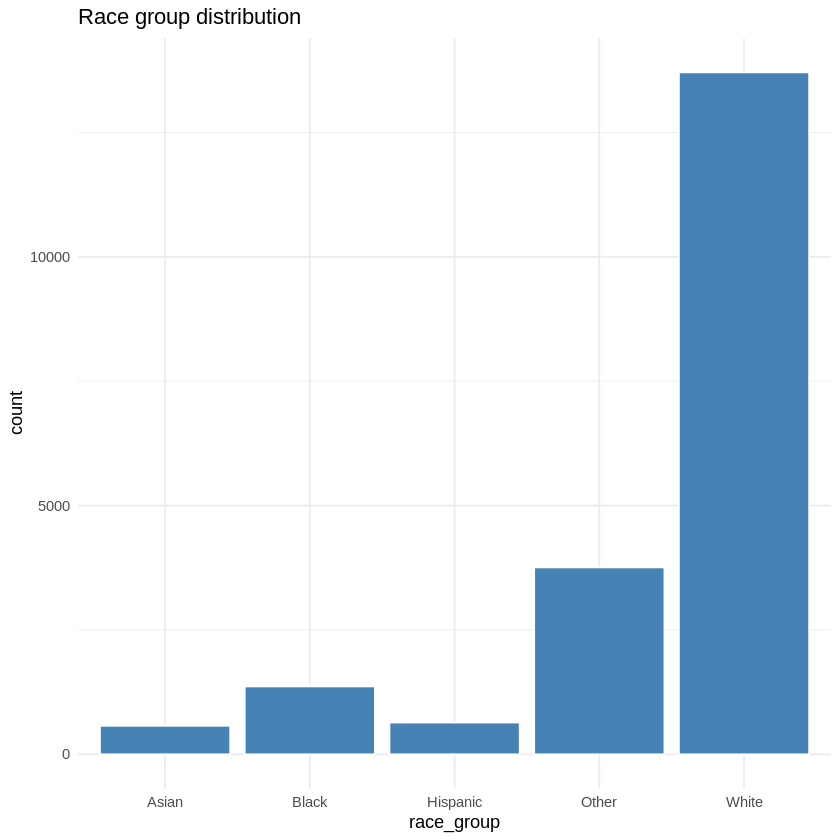

In [19]:
# Plot histogram
ggplot(df, aes(x = race_group)) +
  geom_bar(fill = "steelblue", color = "white") +
  labs(title = "Race group distribution") +
  theme_minimal()

###### ✏️ Plot the distribution by gender

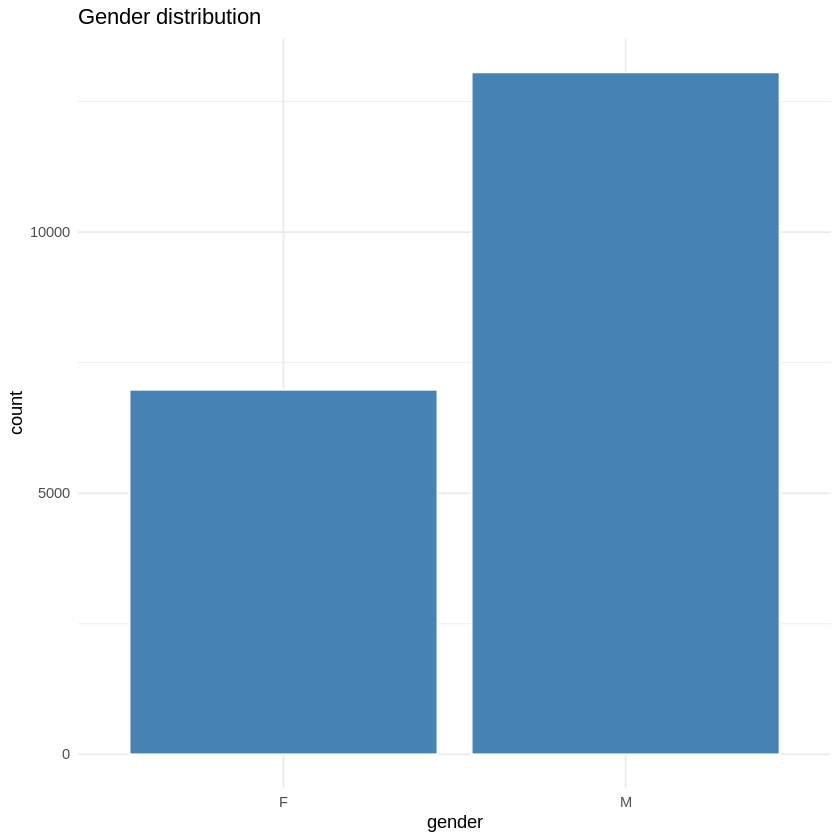

In [20]:
# Plot histogram
ggplot(df, aes(x = gender)) +
  geom_bar(fill = "steelblue", color = "white") +
  labs(title = "Gender distribution") +
  theme_minimal()

###### ✏️ Plot the distribution by age and race group

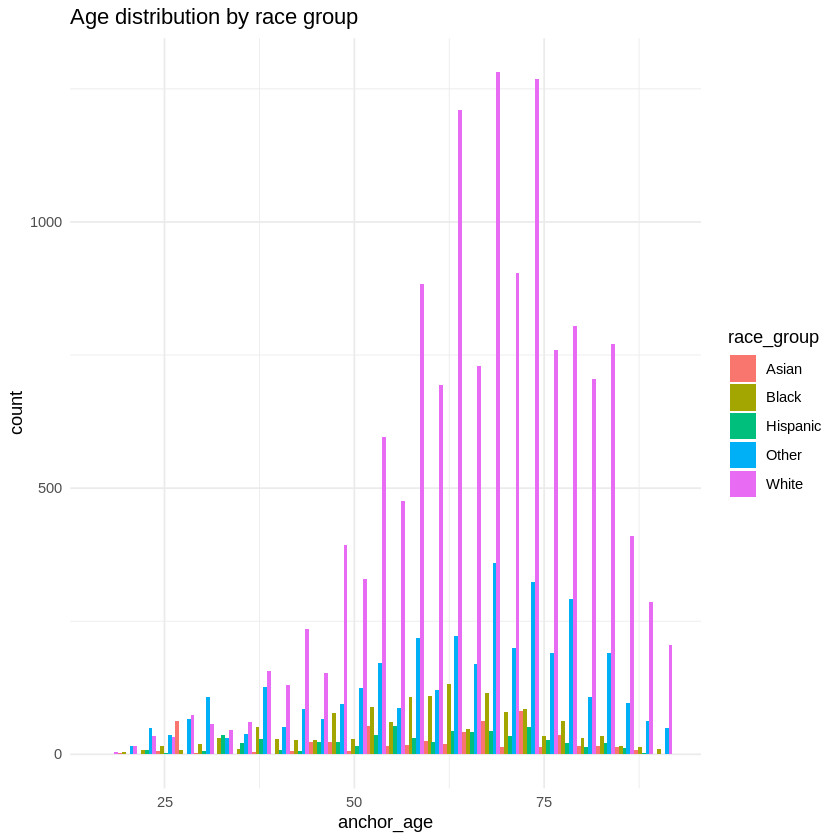

In [21]:
# Plot histogram with multiple dodge bars
ggplot(df, aes(x = anchor_age, fill = race_group)) +
  geom_histogram(position = "dodge", bins = 30) +
  labs(title = "Age distribution by race group") +
  theme_minimal()


#### Box plots and violin plots
**Outilers ❗❗❗**: While in some cases there are no null values, could be outliers values. These outliers are sometimes indicators of biases in data collection, or social/cultural biases. However, in some cases the outliers are erroneous values during data collection and storage. Identifying values such as very high SaO2 (99999) or negative is an indicator in many cases of missing values and should be taken as such.

Bar and violin charts are one of the best ways to identify outliers, because they show us around which values most of our data is clustered.

In [22]:
#' Plot Groupby
#'
#' This function creates two plots that compare the average values of a variable for two groups in a dataframe.
#' The function allows the user to choose between a bar plot, box plot, and violin plot for each group.
#' The first plot compares the averages for the first group, and the second plot compares the averages for the second group.
#'
#' @param df The dataframe.
#' @param group1 Name of the first categorical variable to group by.
#' @param group2 Name of the second categorical variable to group by.
#' @param variable Name of the numerical variable to plot.
#' @param barplot Logical, indicating whether to plot bar plots or not. Default is TRUE.
#' @param boxplot Logical, indicating whether to plot box plots or not. Default is TRUE.
#' @param violinplot Logical, indicating whether to plot violin plots or not. Default is FALSE.
#'
#' @return None
#'
#' @examples
#' plot_groupby(df, group1 = "gender", group2 = "race_group", variable = "SaO2", barplot = TRUE, boxplot = TRUE, violinplot = FALSE)
#'
library(vioplot)

plot_groupby <- function(df, group1, group2, variable, barplot = TRUE, boxplot = TRUE, violinplot = FALSE) {
  avg_by_group1 <- aggregate(df[[variable]], by = list(df[[group1]]), FUN = mean, na.rm = TRUE)
  avg_by_group2 <- aggregate(df[[variable]], by = list(df[[group2]]), FUN = mean, na.rm = TRUE)
  
  if (barplot) {
    # Bar plot
    cat("Bar Plot:\n")
    barplot(avg_by_group1$x, names.arg = avg_by_group1$Group.1, xlab = group1, ylab = paste("Average", variable))
    barplot(avg_by_group2$x, names.arg = avg_by_group2$Group.1, xlab = group2, ylab = paste("Average", variable))
  }
  
  if (boxplot) {
    # Box plot
    cat("Box Plot:\n")
    boxplot(df[[variable]] ~ df[[group1]] + df[[group2]], data = df, xlab = group1, ylab = variable)
  }
  
  if (violinplot) {
    # Violin plot
    cat("Violin Plot:\n")
    vioplot(df[[variable]] ~ df[[group1]] + df[[group2]], data = df, horizontal = FALSE, col = "lightblue")
  }
}


###### ✏️ Plot the distribution of SaO2 by gender and race group

Bar Plot:


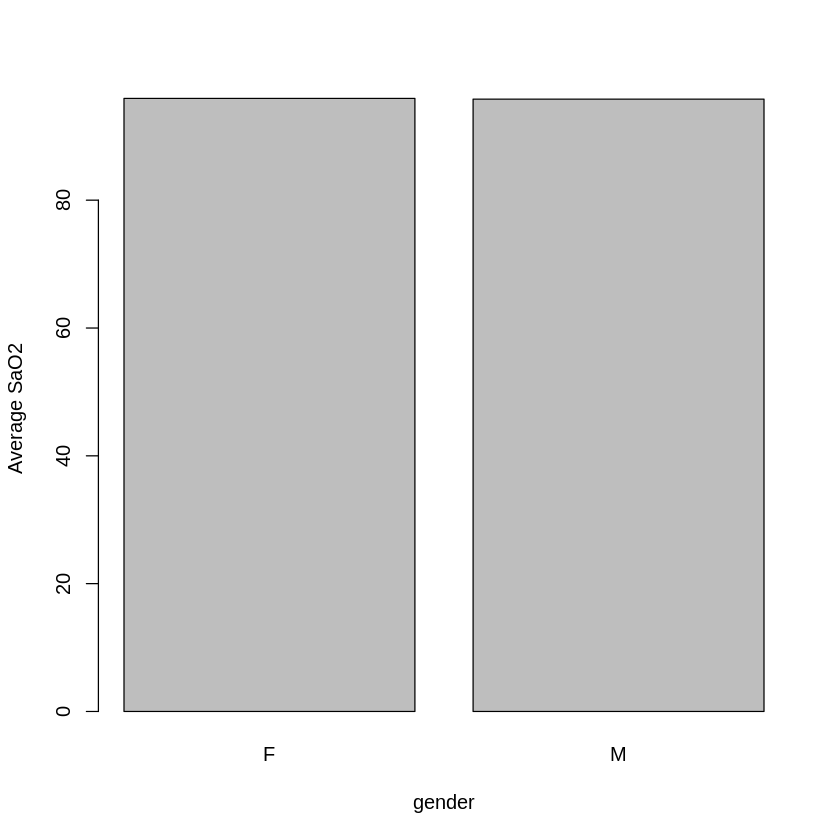

Box Plot:


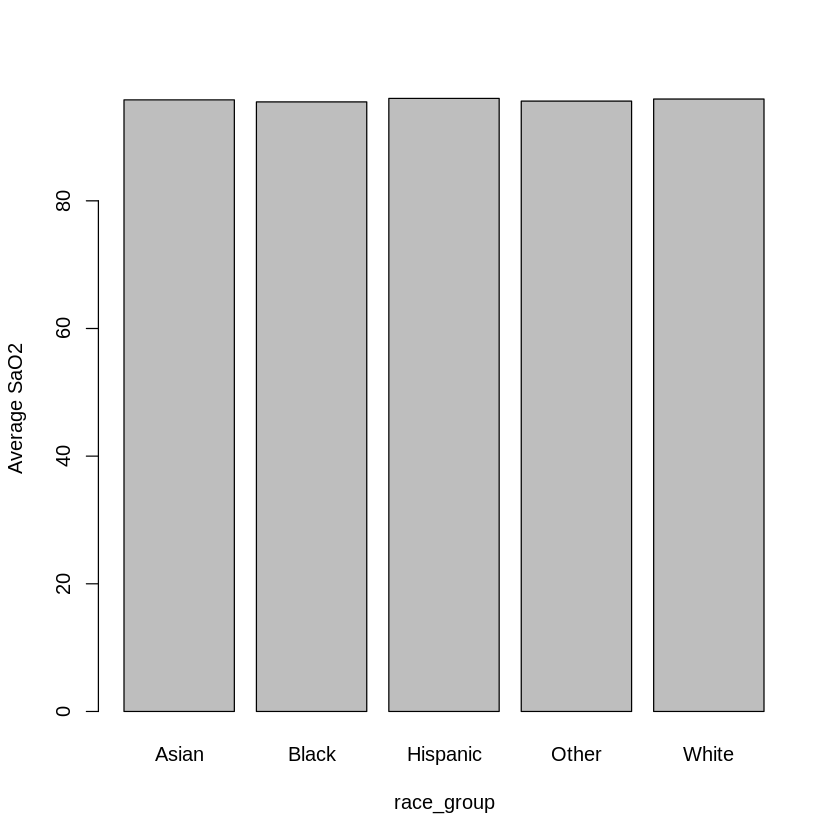

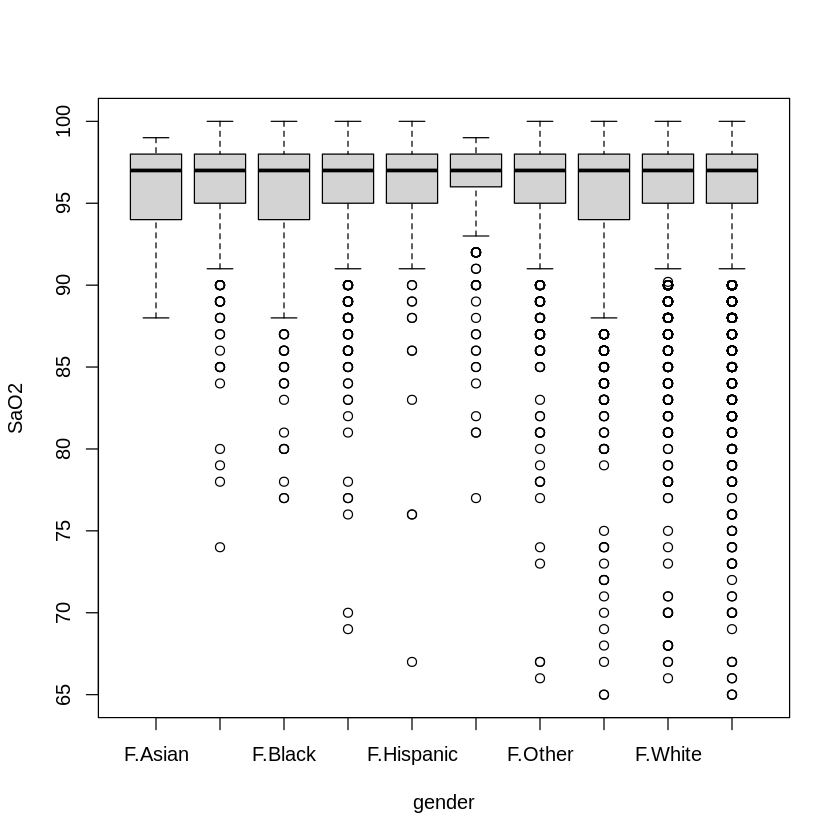

In [23]:
plot_groupby(df, group1='gender', group2='race_group', variable='SaO2')

###### ✏️ Plot the distribution of SpO2 by gender and race group

Bar Plot:


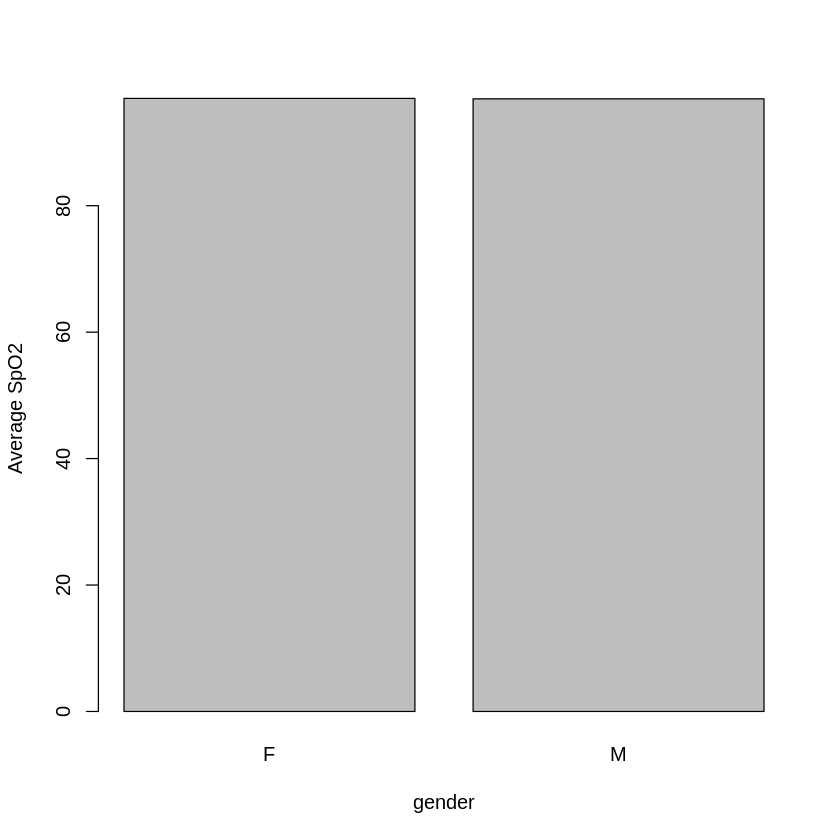

Box Plot:


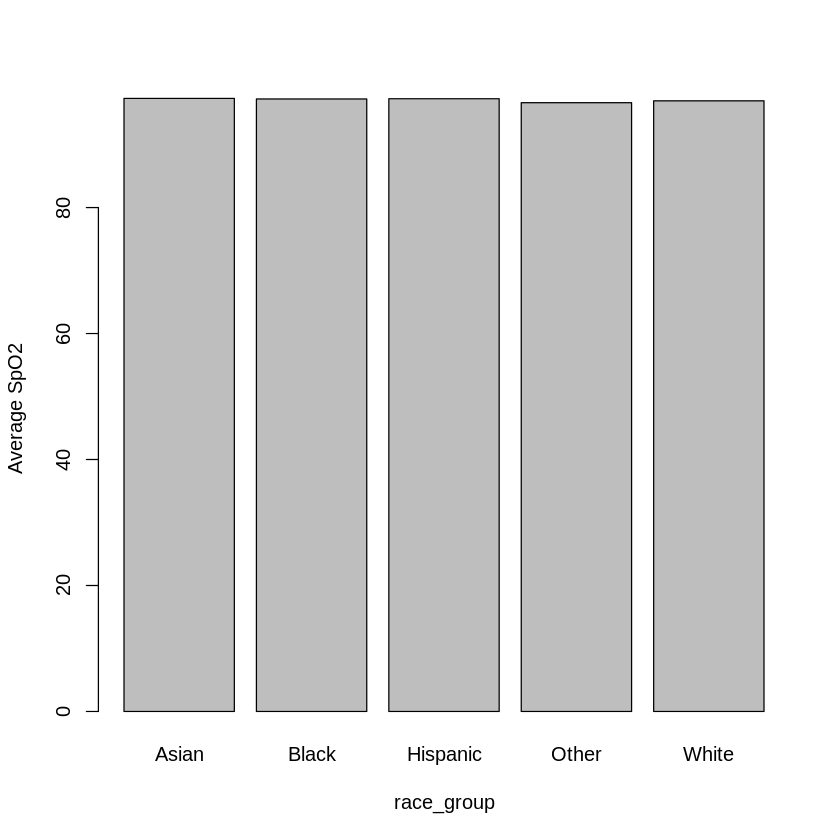

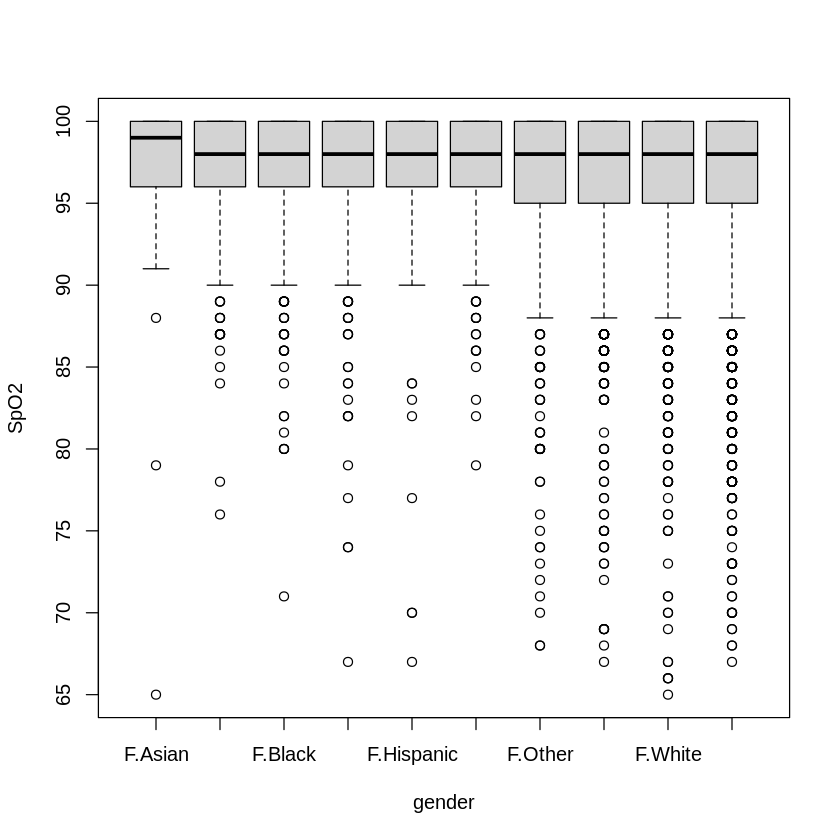

In [24]:
plot_groupby(df, group1='gender', group2='race_group', variable='SpO2')

###### ✏️ Plot the distribution of any Time Offset by gender and race group (Use violin plot)

Hint: You can use the next line of code to get all the variables related to a time offset

In [25]:
for (column in colnames(df)) {
  if (grepl("delta", column)) {
    print(column)
  }
}

[1] "delta_SpO2"


Bar Plot:


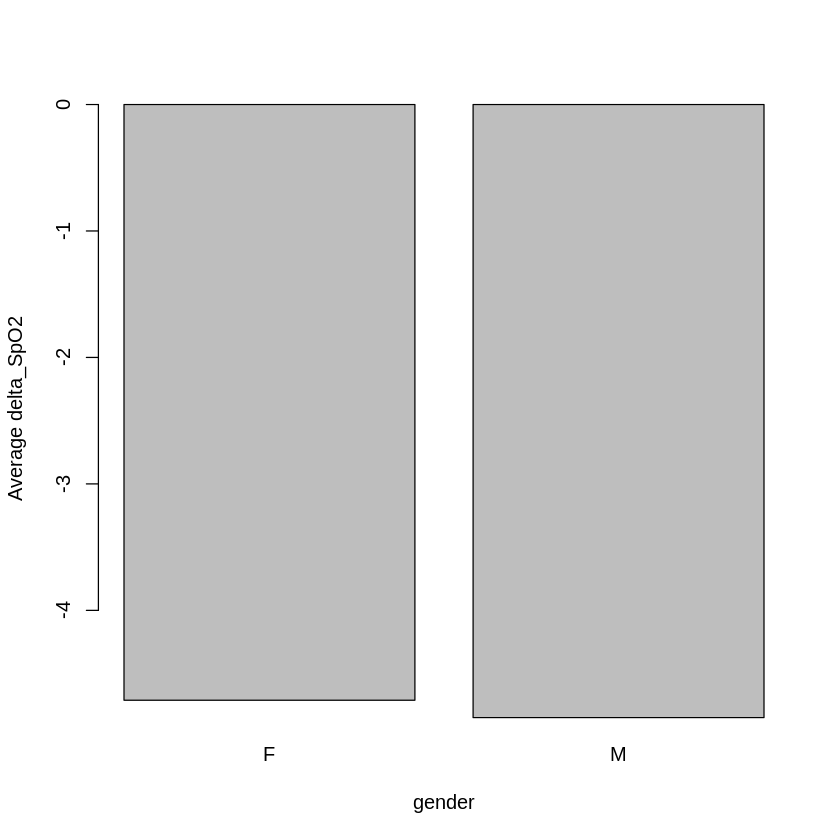

Violin Plot:


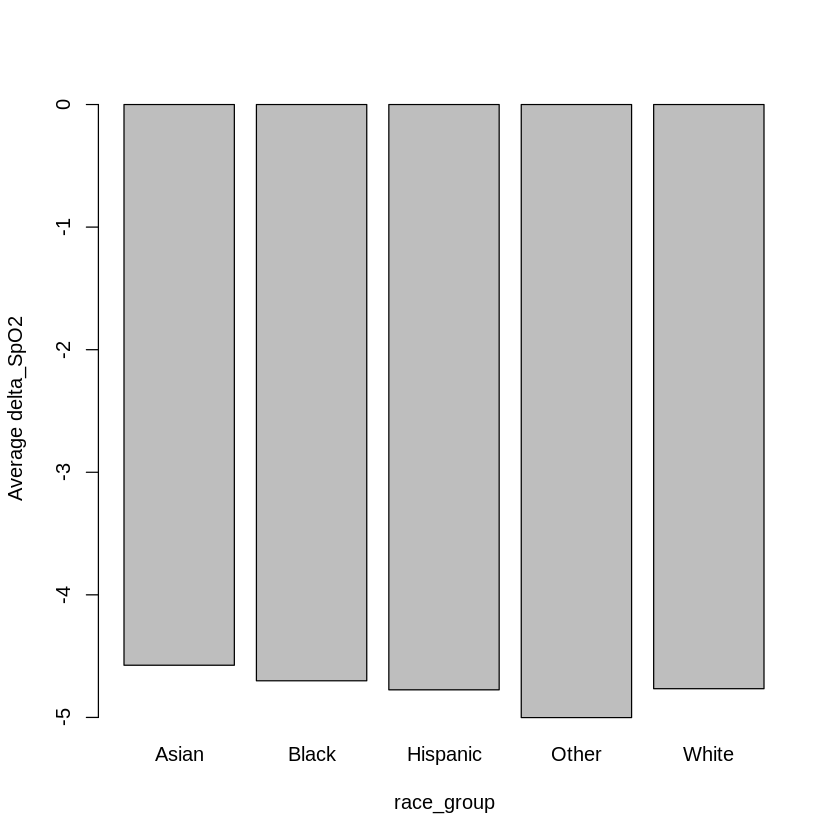

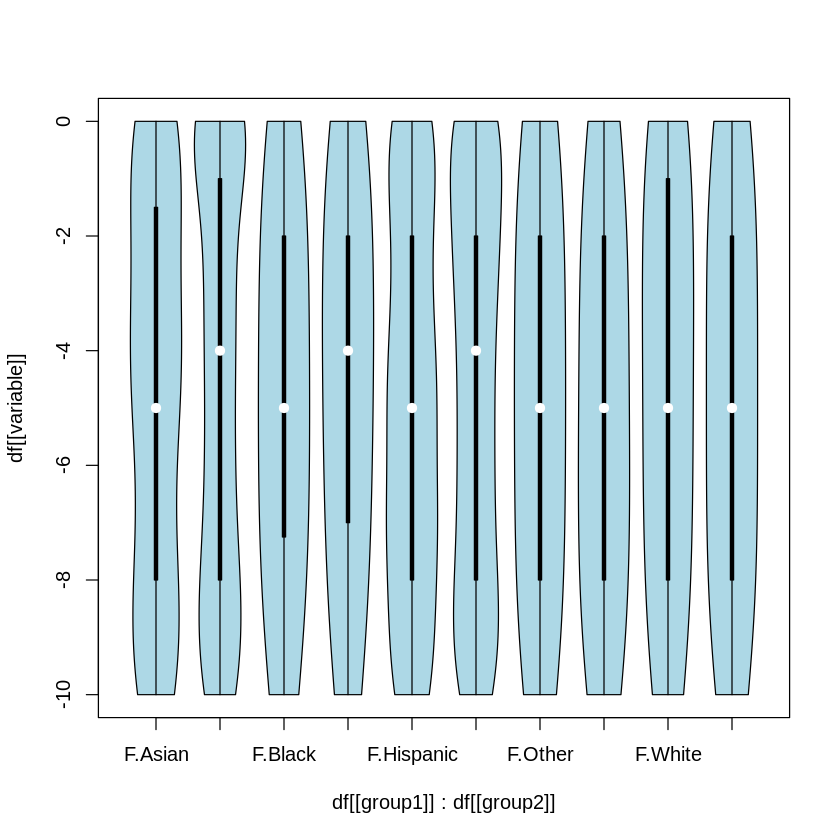

In [26]:
plot_groupby(df, group1='gender', group2='race_group', variable='delta_SpO2', barplot=TRUE, boxplot=FALSE, violinplot=TRUE)

## 4. Preprocessing
---
We know that there are some outliers so let's assume that those values al missing values and then analyze the amount of missing values for preprocessing

### Missing values

Let's see which columns have variables with missing data

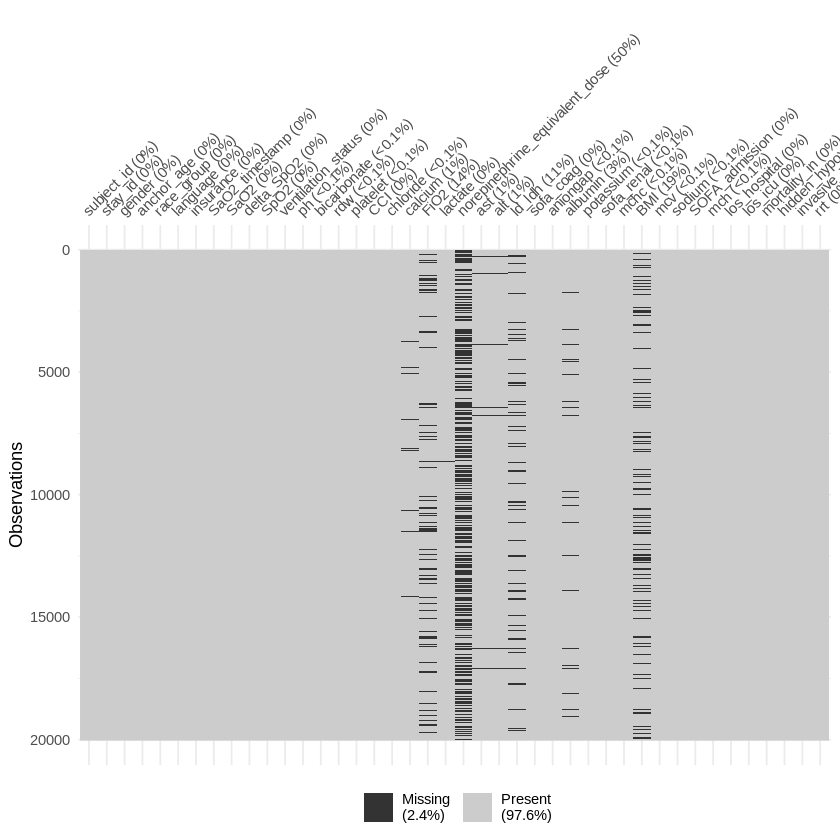

In [27]:
vis_miss(df)

###### ✏️ detect columns with null values
Use the function `null_values` to see the columns with missing data and the number of rows missing.

if the number of values with missing data is very high compared to the size of the dataset (E.g. 85%), in some cases it is better just to remove them

In [28]:
### List of columns with mussing values ###
null_values(df)

[1] "Null values:"
 [1] "ph"                             "bicarbonate"                   
 [3] "rdw"                            "platelet"                      
 [5] "chloride"                       "calcium"                       
 [7] "FiO2"                           "lactate"                       
 [9] "norepinephrine_equivalent_dose" "ast"                           
[11] "alt"                            "ld_ldh"                        
[13] "sofa_coag"                      "aniongap"                      
[15] "albumin"                        "potassium"                     
[17] "sofa_renal"                     "mchc"                          
[19] "BMI"                            "mcv"                           
[21] "sodium"                         "mch"                           


### Train-Test Split
Dividing your dataset into training and test is important, since what we want is for the model to learn, not memorize.
We want to test the behavior of the model on unknown data. For that reason, the dataset should always be divided into training and test. 

The way to divide it may vary... You can use 60% (training) / 40% (testing), or 70% (training) / 30% (testing), or even 50/50. The most important part is that you **make sure that in the test set you have a well-distributed data set that covers all the possibilities.**

In [29]:
# Splits a dataset into train and test sets while ensuring that no rows with the same ID value appear in both sets.
#
# Parameters:
#   df (data.frame): The dataset to be split.
#   test_size (numeric): The proportion of the data to be used for the test set.
#   id_column (character): The name of the column containing the IDs used to identify patients. (A patient in train should not be also in test)
#   stratify (array-like): The values used for stratification. If NULL, stratification is not performed (optional).
#   random_state (numeric): The random seed used for the split (optional).
#
# Returns:
#   list: A list of two data.frames representing the train and test sets.

train_test_split_with_id <- function(df, train_size, id_column, stratify=NULL, random_state=NULL) {
  if (!is.null(stratify)) {
    id_groups <- split(df, df[[id_column]])
    ids <- sapply(id_groups, function(group) group[[id_column]][1])
    ys <- sapply(id_groups, function(group) group[[stratify]][1])
    
    set.seed(random_state)
    train_indices <- createDataPartition(ys, times=1, p=train_size, list=FALSE)
    train_ids <- ids[train_indices]
    test_ids <- ids[-train_indices]
  } else {
    unique_ids <- unique(df[[id_column]])
    
    set.seed(random_state)
    train_indices <- createDataPartition(unique_ids, times=1, p=train_size, list=FALSE)
    train_ids <- unique_ids[train_indices]
    test_ids <- unique_ids[-train_indices]
  }
  
  train <- df[df[[id_column]] %in% train_ids, ]
  test <- df[df[[id_column]] %in% test_ids, ]
  
  cat(paste("The train shape is", dim(train)[1], "\n"))
  cat(paste("The test shape is", dim(test)[1], "\n"))
  
  return(list(train=train, test=test))
}


###### ✏️ Split your data
Use the provided function to split your data into train and test. We have to split the dataset now so we can avoid data leakage during data imputation and data normalization

In [30]:
train_size <- 0.3
id_column <- 'subject_id'
stratify <- 'race_group'

split_data <- train_test_split_with_id(df, train_size, id_column, stratify=stratify, random_state=1)

train <- split_data$train
test <- split_data$test

The train shape is 6171 
The test shape is 13870 


### Data Imputation

There are various imputation methods of different complexity, ranging from imputing using the most common value (mode) (usually used for categorical variables) or the average or median value depending on the distribution of the data (usually used for numerical variables), to imputation methods using machine learning algorithms to predict the missing value using the other variables as a reference. While any method of data imputation can be valid, you have to take care to avoid data leakage or adding bias when doing this process.

As we have the columns with missing data, let's divide the columns into two sub groups:
1. Categorical columns with missing
2. Numerical columns with missing

###### ✏️ Get numerical, categorical columns and columns with missing data

Hint: You can use the function `get_categorical_numerical_variables` to get the list of categorical and mumerical columns. 

Hint 2: You can use the function `null_values` as part of the logic to get the columns with missing data

In [31]:
result

[[1]]
 [1] "gender"             "language"           "insurance"         
 [4] "ventilation_status" "sofa_coag"          "sofa_renal"        
 [7] "mortality_in"       "hidden_hypoxemia"   "invasive_vent"     
[10] "rrt"               

[[2]]
 [1] "anchor_age"                     "SaO2"                          
 [3] "delta_SpO2"                     "SpO2"                          
 [5] "ph"                             "bicarbonate"                   
 [7] "rdw"                            "platelet"                      
 [9] "CCI"                            "chloride"                      
[11] "calcium"                        "FiO2"                          
[13] "lactate"                        "norepinephrine_equivalent_dose"
[15] "ast"                            "alt"                           
[17] "ld_ldh"                         "aniongap"                      
[19] "albumin"                        "potassium"                     
[21] "mchc"                           "BMI"                           
[23] "mcv"                            "sodium"                        
[25] "SOFA_admission"                 "mch"                           
[27] "los_hospital"                   "los_icu"

In [32]:
# Get numerical and categorical columns:
limit <- 10
ignore <- c()

result <- get_categorical_numerical_variables(df, limit = limit, ignore = ignore)

categorical_cols <- result[[1]]
numerical_cols <- result[[2]]

The column subject_id has 7728 unique values, so it is numerical
The column stay_id has 8208 unique values, so it is numerical
The column gender has 2 unique values, so it is categorical
The column anchor_age has 73 unique values, so it is numerical
The column race_group has 5 unique values, so it is categorical
The column language has 2 unique values, so it is categorical
The column insurance has 3 unique values, so it is categorical
The column SaO2_timestamp has 20017 unique values, so it is numerical
The column SaO2 has 41 unique values, so it is numerical
The column delta_SpO2 has 11 unique values, so it is numerical
The column SpO2 has 36 unique values, so it is numerical
The column ventilation_status has 7 unique values, so it is categorical
The column ph has 80 unique values, so it is numerical
The column bicarbonate has 49 unique values, so it is numerical
The column rdw has 199 unique values, so it is numerical
The column platelet has 657 unique values, so it is numerical
The 

In [33]:
# Get the columns with missing data
columns_missing <- names(train)[apply(train, 2, function(x) any(is.na(x)))]
columns_missing

[1] "ph"                             "bicarbonate"                   
 [3] "rdw"                            "platelet"                      
 [5] "chloride"                       "calcium"                       
 [7] "FiO2"                           "lactate"                       
 [9] "norepinephrine_equivalent_dose" "ast"                           
[11] "alt"                            "ld_ldh"                        
[13] "sofa_coag"                      "aniongap"                      
[15] "albumin"                        "potassium"                     
[17] "sofa_renal"                     "mchc"                          
[19] "BMI"                            "mcv"                           
[21] "sodium"                         "mch"

In [34]:
#' Apply data imputation on missing values of columns by grouping the given columns.
#'
#' Important!!! 
#' If you apply a technique other than `new_category` on categorical variables
#' or `new_category_numeric` on numerical variables, you should do it 
#' ONLY AFTER train-test split to avoid data leakage in the test set.
#'
#' @param df A Pandas DataFrame with the input data to apply data imputation.
#' @param impute_cols A list with the column names to apply data imputation.
#' @param test_df (Optional) A Pandas DataFrame with the test set to apply data imputation using train as reference.
#' @param groupby_cols A list with the column names to group by the data if method='median', 'mean', or 'mode' (E.g.: groupby_cols=c('race_group', 'gender')).
#' @param method A string with the method to apply data imputation. Available options are 'median', 'mean', 'mode', 'new_category', 'new_category_numeric', and 'model'.
#'
#' @return A Pandas DataFrame with the data after applying data imputation on missing values of columns.
#'
apply_data_imputation <- function(df, impute_cols, test_df=NULL, groupby_cols=NULL, method='new_category_numeric') {
  
  # Create an empty list to store the imputed values
  imputer <- list()

  for (col in impute_cols) { 
       
    if (method == 'median') {
      # Impute using median (for numerical values)
      imputation_values <- aggregate(df[col], df[groupby_cols], median)
      
    } else if (method == 'mean') {
      # Impute using mean (for numerical values)
      imputation_values <- aggregate(df[col], df[groupby_cols], mean)
      
    } else if (method == 'mode') {
      # Impute using mode (for categorical values)
      imputation_values <- aggregate(df[col], df[groupby_cols], function(x) {
        as.character(names(table(x))[which.max(table(x))])
      })
      
    } else if (method == 'new_category') {
      # Add a new category 'None' in the dataset (for categorical values)
      new_category_val <- 'None'
      imputer[[col]] <- new_category_val
      df[col][is.na(df[col])] <- new_category_val
      if (!is.null(test_df)) {
        test_df[col][is.na(test_df[col])] <- new_category_val
      }
      
    } else if (method == 'new_category_numeric') {
      # Add an anomalous data in the dataset (for numerical values)
      new_category_val <- 0
      # If there's no 0, replace NaN with 0
      if (!any(df[col] == 0, na.rm = TRUE)) {
        new_category_val <- 0
      }
      # If there are no positive numbers, replace NaN with 1
      else if (!any(df[col] >= 0, na.rm = TRUE)) {
        new_category_val <- 1
      }
      # If there are no negative numbers, replace NaN with -1
      else if (!any(df[col] <= 0, na.rm = TRUE)) {
        new_category_val <- -1
      } else {
        # Replace with min value - 100
        new_category_val <- min(df[col], na.rm=TRUE) - 100
      }
      
      imputer[[col]] <- new_category_val
      df[col][is.na(df[col])] <- new_category_val
      if (!is.null(test_df)) {
        test_df[col][is.na(test_df[col])] <- new_category_val
      }
      
    }
    
    if (method %in% c('median', 'mean', 'mode')) {
      imputer[[col]] <- imputation_values
      # Fill missing values with the method of the corresponding group
      df[col][is.na(df[col])] <- apply(df[is.na(df[col]), c(col, groupby_cols)], 1, function(x) {
        method_values <- imputation_values[as.list(x[groupby_cols])]
        ifelse(is.na(x[col]), method_values, x[col])
      })
      if (!is.null(test_df)) {
        test_df[col][is.na(test_df[col])] <- apply(test_df[is.na(test_df[col]), c(col, groupby_cols)], 1, function(x) {
          method_values <- imputation_values[as.list(x[groupby_cols])]
          ifelse(is.na(x[col]), method_values, x[col])
        })
      }
    }
  }
  
  if (!is.null(test_df)) {
    return(list(df, test_df, imputer))
  } else {
    return(list(df, imputer))
  }
}


###### ✏️ Apply data imputation to categorical variables

1. Get from the categorical variables the list of categorical columns with missing data
2. Use the function `apply_data_imputation` to impute the variables of train and test data. You can also use other methods of pandas or sklearn. But think about the possible bias that those methods could be adding to the dataset.

In [35]:
# Get from columns with missing data the categorical columns
categorical_cols_missing <- intersect(categorical_cols, columns_missing)
categorical_cols_missing

[1] "sofa_coag"  "sofa_renal"

**Important❗❗❗** If you apply other technique than `new_category` on categorical variables. You should do it after train-test split otherwise you could be introducing a data leakage in the test set

In [36]:
# Set the method and groupby columns
method <- 'new_category'  # 'mode', 'new_category'
groupby_cols <- c('race_group', 'gender')  # E.g. c('race_group', 'gender')

# Apply data imputation
train_test_imputed <- apply_data_imputation(train, impute_cols = categorical_cols_missing, method = method, groupby_cols = groupby_cols, test_df = test)
train <- train_test_imputed[[1]]
test <- train_test_imputed[[2]]
imputer <- train_test_imputed[3]

###### ✏️ Apply data imputation to Numerical variables

1. Get from the numerical variables the list of numerical columns with missing data
2. Use the function `apply_data_imputation` to impute the variables of train and test data. You can also use other methods of pandas or sklearn. But think about the possible bias that those methods could be adding to the dataset.

In [37]:
# Get from columns with missing data the numerical columns
numerical_cols_missing <- intersect(numerical_cols, columns_missing)
numerical_cols_missing

[1] "ph"                             "bicarbonate"                   
 [3] "rdw"                            "platelet"                      
 [5] "chloride"                       "calcium"                       
 [7] "FiO2"                           "lactate"                       
 [9] "norepinephrine_equivalent_dose" "ast"                           
[11] "alt"                            "ld_ldh"                        
[13] "aniongap"                       "albumin"                       
[15] "potassium"                      "mchc"                          
[17] "BMI"                            "mcv"                           
[19] "sodium"                         "mch"

**Important ❗❗❗** If you apply other technique than `new_category_numeric` on numerical variables. You should do it after train-test split otherwise you could be introducing a data leakage in the test set

In [38]:
method = 'new_category_numeric' # 'median', 'mean', 'new_category_numeric', 'model'
groupby_cols = c('race_group', 'gender') # E.g. c('race_group', 'gender')

# Apply data imputation
train_test_imputed <- apply_data_imputation(train, impute_cols = numerical_cols_missing, method = method, groupby_cols = groupby_cols, test_df = test)
train <- train_test_imputed[[1]]
test <- train_test_imputed[[2]]
imputer <- train_test_imputed[3]

###### ✏️ Let's check null values again

Print the coluns with missing values (if any) in train and test set. 

There should be no columns with missing data, if so check the previous tasks

In [39]:
# Print columns with missing values in train dataset
cat(rep("#", 40), ' Null train: ', rep("#", 40), "\n")
null_values(train)

# Print columns with missing values in test dataset
cat(rep("#", 40), ' Null test: ', rep("#", 40), "\n")
null_values(test)

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #  Null train:  # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
[1] "There aren't null values in the dataframe"
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #  Null test:  # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
[1] "There aren't null values in the dataframe"


### Encoding

Since the machine learning model in the background models and finds patterns in our data. It only supports numeric values. For this reason, categorical variables must be coded to numeric values.

Categorical variables can be of 3 types:
- Binary variables: Binary variables can be represented with two values, 1 and 0. Examples are whether or not the variable belongs to a group.
- Ordinal variables: Ordinal variables are a type of variables that have a specific order and can be represented with numeric variables through a label encoder. An example is High, Medium, and Low which can be represented as 3, 2, 1.
- Nominal variables: Nominal variables are categorical variables that do not have a defined order, for these variables it is not recommended to use a label encoder, it is better to use one hot encoder in these cases.

###### ✏️ Which type of categorical variables we have?

From the list of categorical variables, provide:

* List of binary variables
* List of ordinal variables
* List of Nominal variables

Not necessarily must have variables of each type.

Hint: you can use `unique(df$column)` to see the unique values in a specific column. You can use this information to make your decisions

In [40]:
cat("Categorical:\n")
print(categorical_cols)

Categorical:
 [1] "gender"             "race_group"         "language"          
 [4] "insurance"          "ventilation_status" "sofa_coag"         
 [7] "sofa_renal"         "mortality_in"       "hidden_hypoxemia"  
[10] "invasive_vent"      "rrt"               


In [41]:
for (column in categorical_cols) {
  cat("Column '", column, "' has values: ", unique(train[[column]]), "\n")
}

Column ' gender ' has values:  F M 
Column ' race_group ' has values:  Black White Hispanic Other Asian 
Column ' language ' has values:  Proficient Limited Proficiency 
Column ' insurance ' has values:  Medicare Other Medicaid 
Column ' ventilation_status ' has values:  NonInvasiveVent InvasiveVent SupplementalOxygen  HFNC Tracheostomy 
Column ' sofa_coag ' has values:  1 0 2 3 4 None 
Column ' sofa_renal ' has values:  0 2 1 3 4 None 
Column ' mortality_in ' has values:  1 0 
Column ' hidden_hypoxemia ' has values:  0 1 
Column ' invasive_vent ' has values:  0 1 
Column ' rrt ' has values:  0 1 


###### ✏️ Encode binary variables

Machine learning models only understand numbers, so binary variables must be encoded as 1s and 0s. Replace the values in those columns with 1s and 0s. 
Also in r you have the option to convert the values to values of type factor.

In [42]:
train$gender <- ifelse(train$gender == 'F', 1, 0)
test$gender <- ifelse(test$gender == 'F', 1, 0)

train$language <- ifelse(train$language == 'Proficient', 1, 0)
test$language <- ifelse(test$language == 'Proficient', 1, 0)

###### ✏️ Encode ordinal variables

You can use the function label_encoder to encode the ordinal variables as numeric variables.

In [43]:
label_encoder <- function(df, cols, df_test = NULL) {
  # This function applies label encoding to categorical variables in a data frame.
  #
  # Parameters:
  #   - df: R data frame. The data frame to be encoded.
  #   - cols: character vector. The column names to be encoded.
  #   - df_test: R data frame (optional). The test data frame to be encoded using the same encoders as the training data.
  #
  # Returns:
  #   - If df_test is NULL, the function returns a list containing the encoded data frame and a named list with the encoders used for each column.
  #   - If df_test is provided, the function returns a list with the encoded training data frame, the encoded test data frame, and a named list with the encoders used for each column.
  
  encoders <- list()
  for (col in cols) {
    df[[col]] <- factor(df[[col]])
    encoders[[col]] <- levels(df[[col]])
    
    if (!is.null(df_test)) {
      df_test[[col]] <- factor(df_test[[col]], levels = encoders[[col]])
    }
  }
  
  if (is.null(df_test)) {
    return(list(df = df, encoders = encoders))
  } else {
    return(list(df = df, df_test = df_test, encoders = encoders))
  }
}

label_encoder_test <- function(df, encoders) {
  # This function applies label encoding to categorical variables in a data frame using the encoders trained on the training data.
  #
  # Parameters:
  #   - df: R data frame. The data frame to be encoded.
  #   - encoders: named list. The encoders trained on the training data.
  #
  # Returns:
  #   - The encoded data frame.
  
  for (col in names(encoders)) {
    df[[col]] <- factor(df[[col]], levels = encoders[[col]])
  }
  
  return(df)
}


In [44]:
train$sofa_coag <- replace(train$sofa_coag, train$sofa_coag == "None", -1)
test$sofa_coag <- replace(test$sofa_coag, test$sofa_coag == "None", -1)

train$sofa_renal <- replace(train$sofa_renal, train$sofa_renal == "None", -1)
test$sofa_renal <- replace(test$sofa_renal, test$sofa_renal == "None", -1)

In [45]:
### This maybe is not the case, but just to show how to use the function:
trai_test_encoded = label_encoder(train, c('insurance'), df_test=test)
train = trai_test_encoded$df
test = trai_test_encoded$df_test

###### ✏️ Encode nominal variables

You can use the function `column_to_one_hot` to encode the nominal variables to a [one-hot representation](https://lost-stats.github.io/Data_Manipulation/Creating_Dummy_Variables/creating_dummy_variables.html).

In [46]:
column_to_one_hot <- function(train_df, column, test_df=NULL) {
  # Generate a one-hot representation of the values in the column
  train_one_hot <- model.matrix(~ . - 1, data = train_df[column])
  # Add the one-hot encoded columns to the DataFrame
  train_df <- cbind(train_df, train_one_hot)
  # Drop the original column
  train_df[, column] <- NULL

  if (!is.null(test_df)) {
    test_one_hot <- model.matrix(~ . - 1, data = test_df[column])    
    # Add missing columns in test data
    missing_cols <- setdiff(colnames(train_one_hot), colnames(test_one_hot))
    for (col in missing_cols) {
      test_one_hot[, col] <- 0
    }
    # Ensure the order of columns in the test set is the same as in the train set
    test_one_hot <- test_one_hot[, colnames(train_one_hot)]
    # Add the one-hot encoded columns to the test DataFrame
    test_df <- cbind(test_df, test_one_hot)
    # Drop the original column
    test_df[, column] <- NULL
    
    return(list(train_df, test_df))
  } else {
    return(train_df)
  }
}


In [47]:
# convert 'ventilation_status' column into one-hot encoding
train$ventilation_status <- replace(train$ventilation_status, train$ventilation_status == "None", "None_ventilation")
test$ventilation_status <- replace(test$ventilation_status, test$ventilation_status == "None", "None_ventilation")
train_test <- column_to_one_hot(train, "ventilation_status", test)
train <- train_test[[1]]
test <- train_test[[2]]

# convert 'race_group' column into one-hot encoding
train$race_group <- replace(train$race_group, train$race_group == "Other", "Other_race_group")
test$race_group <- replace(test$race_group, test$race_group == "Other", "Other_race_group")
train_test <- column_to_one_hot(train, "race_group", test)
train <- train_test[[1]]
test <- train_test[[2]]

# convert 'insurance' column into one-hot encoding
train_test <- column_to_one_hot(train, "insurance", test)
train <- train_test[[1]]
test <- train_test[[2]]

### Feature Engineering

Once we have cleaned the dataset we can engineer the features that can provide more information to the model to generate the predictions.

We'll print the correlation to SpO2 as a reference to see the most correlated variables before and after generating the new features.

In [48]:
# Get variables correlated to SpO2
columns_sao2 <- get_most_correlated(train, variable = "SpO2", n = 8)

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # SpO2 # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
The 8 most correlated variables to variable SpO2 are:
                          SaO2                        albumin 
                    0.58515538                     0.11986463 
                      chloride                           mchc 
                    0.10923707                     0.06208018 
                    anchor_age                  invasive_vent 
                    0.04828020                     0.04003564 
ventilation_statusInvasiveVent                             ph 
                    0.03920411                     0.03642591 
The 8 most inversely correlated variables to variable SpO2 are:
                SOFA_admission                       aniongap 
                   -0.14966961                    -0.14868471 
              hidden_hypoxemia norepinephrine_equivalent_dose 
                   -0.1

In [49]:
# Length of ICU stay in days for dead
train$los_icu_dead <- ifelse(train$mortality_in == 1, train$los_icu, NA)
test$los_icu_dead <- ifelse(test$mortality_in == 1, test$los_icu, NA)

# Length of ICU stay in days for survivors
train$los_icu_surv <- ifelse(train$mortality_in == 0, train$los_icu, NA)
test$los_icu_surv <- ifelse(test$mortality_in == 0, test$los_icu, NA)

In [50]:
# Apply data imputation
method = 'new_category_numeric' # 'median', 'mean', 'new_category_numeric', 'model'
impute_cols = c('los_icu_dead', 'los_icu_surv')

train_test_imputed <- apply_data_imputation(train, impute_cols = impute_cols, method = method, test_df = test)
train <- train_test_imputed[[1]]
test <- train_test_imputed[[2]]

In [51]:
# Get variables correlated to SpO2
columns_sao2 <- get_most_correlated(train, variable = "SpO2", n = 8)

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # SpO2 # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
The 8 most correlated variables to variable SpO2 are:
                          SaO2                        albumin 
                    0.58515538                     0.11986463 
                      chloride                           mchc 
                    0.10923707                     0.06208018 
                    anchor_age                  invasive_vent 
                    0.04828020                     0.04003564 
ventilation_statusInvasiveVent                             ph 
                    0.03920411                     0.03642591 
The 8 most inversely correlated variables to variable SpO2 are:
                SOFA_admission                       aniongap 
                   -0.14966961                    -0.14868471 
              hidden_hypoxemia norepinephrine_equivalent_dose 
                   -0.1

Surprise! we can see how before the correlation `los_icu` and `mortality_in` were not there, but after the feature engineering the new feature `los_icu_dead` is there! 

That shows the importance of being able to do good feature engineering.

###### ✏️ Create your own features (Optional)

Use the dataset to generate new features

### Normalization:
Data normalization is an important step in machine learning because it helps to ensure that features are on similar scales, which can improve the performance of many machine learning algorithms.

When features are not on similar scales, some algorithms may be more heavily influenced by certain features than others, which can lead to suboptimal performance. Additionally, some algorithms (such as those based on distance calculations) can be sensitive to differences in scale between features, which can lead to incorrect results.

By normalizing the data, we can ensure that each feature contributes equally to the model, regardless of its scale. This can lead to better accuracy and more robust models.

In [72]:
normalize_data <- function(train_data, test_data=NULL, scaler=NULL, ignore_cols=character()) {
  # Filter out columns to ignore
  train_data_filtered <- train_data[, !(colnames(train_data) %in% ignore_cols)]
  
  if (is.null(scaler)) {
    scaler <- preProcess(train_data_filtered, method="range")
  }

  normalized_train <- predict(scaler, train_data_filtered)
  normalized_train_df <- as.data.frame(normalized_train)
  colnames(normalized_train_df) <- colnames(train_data_filtered)
  
  if (!is.null(test_data)) {
    test_data_filtered <- test_data[, !(colnames(test_data) %in% ignore_cols)]
    normalized_test <- predict(scaler, test_data_filtered)
    normalized_test_df <- as.data.frame(normalized_test)
    colnames(normalized_test_df) <- colnames(test_data_filtered)

    return(list(normalized_train_df, normalized_test_df, scaler))
  } else {
    return(list(normalized_train_df, scaler))
  }
}

###### ✏️ Normalize your data

Use the function to normalize the data. Remember to exclude information that does not contribute to the final model, such as identifiers.

Feel free to include other data [normalization methods](https://www.pluralsight.com/guides/normalizing-data-r).

In [73]:
ignore_cols = c('stay_id', 'subject_id', 'SaO2_timestamp')
normalizar_train_test = normalize_data(train, test_data=test, ignore_cols=ignore_cols)
normalized_train = normalizar_train_test[[1]]
normalized_test = normalizar_train_test[[2]]
scaler = normalizar_train_test[[3]]

### Class Imbalance
In order to allow you to play with other methods for data balancing such as modifying the weights of the model. The dataset will be delivered unbalanced. However it is important that you play around with different methods such as undersampling or oversampling to balance the training data.

### Save the file!
Finally let's save the dataset as a csv file! 😀

In [78]:
head(normalized_train)

,gender,anchor_age,language,SaO2,delta_SpO2,SpO2,ph,bicarbonate,rdw,platelet,⋯,race_groupAsian,race_groupBlack,race_groupHispanic,race_groupOther_race_group,race_groupWhite,insuranceMedicaid,insuranceMedicare,insuranceOther,los_icu_dead,los_icu_surv
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.6849315,1,0.6969697,0.6,0.6764706,0.9672346,0.62,0.5737705,0.11365430,⋯,0,1,0,0,0,0,1,0,0.08859903,0.00000000
13,0,0.7945205,1,0.9393939,0.3,1.0000000,0.9659240,0.44,0.4786885,0.11523283,⋯,0,0,0,0,1,0,0,1,0.00000000,0.02628812
14,0,0.7945205,1,0.9393939,0.0,1.0000000,0.9672346,0.44,0.4786885,0.11523283,⋯,0,0,0,0,1,0,0,1,0.00000000,0.02628812
15,0,0.7945205,1,0.9393939,0.5,1.0000000,0.9685452,0.42,0.5245902,0.07971586,⋯,0,0,0,0,1,0,0,1,0.00000000,0.02628812
20,0,0.5479452,0,0.9696970,1.0,1.0000000,0.9777195,0.46,0.4032787,0.09155485,⋯,0,0,1,0,0,1,0,0,0.00000000,0.03009989
21,0,0.5479452,0,0.8787879,0.0,0.9411765,0.9633028,0.46,0.4032787,0.09155485,⋯,0,0,1,0,0,1,0,0,0.00000000,0.03009989


###### ✏️ Save your train and test dataset as a csv file:

Hint: use `write.csv(df, file = "path/data_clean.csv", row.names = FALSE)`

In [75]:
##### Set the path to your output datasets:

# Dataset Path:
out_train <- 'oxygen_dataset/train.csv'
out_test <- 'oxygen_dataset/test.csv'

In [76]:
# Function to create the directory if it doesn't exist
create_directory_if_not_exists <- function(path) {
  directory <- dirname(path)
  dir.create(directory, recursive = TRUE, showWarnings = FALSE)
}

# Save function to be used for both train and test datasets
save_dataset <- function(dataset, path_to_save) {
  create_directory_if_not_exists(path_to_save)
  write.csv(dataset, file = path_to_save, row.names = FALSE)
}

# Save train dataset
save_dataset(normalized_train, out_train)

# Save test dataset
save_dataset(normalized_test, out_test)